# Root Finding: Secant Method
---

GENERAL PROBLEM: find the real roots of a given function $f(x)$ in the case when closed-form solutions are not available. That is, find the values of $x$ that satisfy the equation

\begin{align}
  f(x) = 0
\end{align}

where $x$ is a real variable, and $f(x)$ is some non-linear function.

IDEA: use the roots of secant lines to construct successive approximations to the actual root of the function. 

PRE-REQUISITES:
- Bisection method

REFERENCES:
- [1] Burden and Faires, *Numerical Analysis, 7th edition*.
- [2] Ralston and Rabinowitz, *A First Course in Numerical Analysis, 2nd edition*.
- [3] Press et al, *Numerical Recipes: the Art of Scientific Computing, 3rd edition*.
- [4] Stoer and Bulirsch, *Introduction to Numerical Analysis, 2nd edition*.

## 1. Summary of the method

As with the bisection method, we assume that we have identified an interval $[a,b]$ that brackets a root of $f(x)$.

The idea behind the secant method is to connect the points $(a,f(a))$ and $(b,f(b))$ by a line, then use the root of that line as an improved approximation of the root of $f(x)$, and repeat. At each iteration, the previous two estimates are used to construct the next secant line. The process is continued until the root is located to within some given tolerance, or alternatively when the maximum allowed number of iterations is reached.

To start the method, let $x_{-1}=a$ and $x_{0}=b$. The equation for the line that passes through points $(x_{-1}, f(x_{-1}))$ and $(x_{0}, f(x_{0}))$ is

\begin{align}
  g_{1}(x) = \frac{(x - x_{-1})}{(x_{0} - x_{-1})}f(x_{0}) 
  + \frac{(x - x_{0})}{(x_{-1} - x_{0})}f(x_{-1}).
\end{align}

We take the next approximant to be where this line crosses zero, namely

\begin{align}
  x_{1} = x_{0} - f(x_{0})\frac{x_{0} - x_{-1}}{f(x_{0}) - f(x_{-1})}
        = \frac{x_{-1}f(x_{0}) - x_{0}f(x_{-1})}{f(x_{0}) - f(x_{-1})} .
\end{align}

During the $i$th iteration, the secant line generated by the previous two approximants is

\begin{align}
  g_{i+1}(x) = \frac{(x - x_{i})}{(x_{i-1} - x_{i})}f(x_{i-1}) 
  + \frac{(x - x_{i-1})}{(x_{i} - x_{i-1})}f(x_{i}).
\end{align}

whose root provides the next approximant

\begin{align}
  x_{i+1} = x_{i} - f(x_{i})\frac{x_{i} - x_{i-1}}{f(x_{i}) - f(x_{i-1})}
        = \frac{x_{i-1}f(x_{i}) - x_{i}f(x_{i-1})}{f(x_{i}) - f(x_{i-1})} .
\end{align}

The relative uncertainty in the location of the root at the end of an iteration is taken to be

\begin{align}
  \mathsf{REL}
  = \left|\frac{\text{(current approximant)} - \text{(previous approximant)}}{\text{(current approximant)}}\right|
  = \left|\frac{x_{i+1} - x_{i}}{x_{i+1}}\right|
\end{align}

We should also calculate the error of any proposed root candidate  

\begin{align}
  \mathsf{ABS} = \left|f(x_{i+1})\right|
\end{align}

In the algorithm below, the process of searching for a root continues until both of these errors are less than some specified tolerance (or the maximum allowed number of iterations is reached).

(PROGRAMMER'S NOTE: when starting from values close to the actual root, the secant method often converges faster than the bisection method. However, one drawback is that the secant method does not always keep the root bracketed, and so unlike the bisection method, convergence is not assured. It is therefore advisable to issue a warning any time an iteration occurs when the root is no longer bracketed.)

## 2. Algorithm

**INPUT**
- an interval $[a,b]$ where a root of the function in question is known to exist.
- TOL, the relative error tolerance that the answer is required to have.
- $i_\mathrm{max}$, maximum number of iterations allowed.

**Validate initial interval**
- if $\phi(a,b) \geq 0$, complain and quit. Otherwise continue.

**Initialize loop**
- set $x_{-1}=a$ and $x_{0}=b$
- set $i = 0$

**Loop** while $i \leq i_\mathrm{max}$

- calculate root of the secant line
  - $x_{i+1} = x_{i} - f(x_{i})(x_{i} - x_{i-1})/(f(x_{i}) - f(x_{i-1}))$


- calculate the relative uncertainty using:  REL $= \left|(x_{i+1} - x_{i})/x_{i+1}\right|$


- calculate ABS $= |f(x_{i+1})|$


- if (REL $\leq$ TOL) and (ABS $\leq$ TOL), stop. Otherwise, continue.


- i = i + 1


**Max iterations reached**
- Print message that max iterations have been reached, and stop.

**OUTPUT**

root found, or message of failure

## 3. CODE

In [1]:
%%writefile secant.py
import numpy as np
import sys
def secant(f, x0, x1, TOL, imax):
    """
    Function that searches for roots of f(x) using the secant method.
    
    INPUT
    f     : function whose roots are being sought 
    x0    : initial guess 1
    x1    : initial guess 2
    TOL   : allowed tolerance
    imax  : maximum number of iterations
    
    OUTPUT
    location of the root to within the allowed tolerance, or failure message
    
    """
    
    # test initial bracket 
    if np.sign(f(x0))*np.sign(f(x1)) > 0:
        # if sgn > 0, problem may not be well-defined
        print('WARNING: function has the same sign at both ends of the interval.')
        print('This may lead to convergence problems. Proceed with caution!')

    # initialize iteration
    xOld = x0
    xNew = x1
    
    # iterate search using secant method
    i = 1  # reset iteration number
    while i <= imax:
            
        # rotate previous approximate locations of root
        xOldOld = xOld # xOld --> xOldOld
        xOld = xNew    # xNew --> xOld
        
        # update approximate location of root
        xNew = xOld - f(xOld)*(xOld - xOldOld)/(f(xOld) - f(xOldOld))
        print('iteration',i,': approximate location of root at',xNew)
    
        # calculate errors
        xErr = np.abs((xNew - xOld)/xNew)
        fErr = np.abs(f(xNew))

        # check if errors are within the allowed tolerance
        if (xErr <= TOL and fErr <= TOL):
            best = xNew #best estimate
            delta = np.abs(xNew-xOld) #uncertainty
            print('SUCCESS! Root has been located to within the specified tolerance after',i,'iterations.')
            print('Root is located at',best,'+/-',delta)
            return
        
        # increment iteration number
        i = i + 1

    # print message that max iteration has been reached
    print('FAIL! Max number of iterations has been reached. Stopping.')
    return

Writing secant.py


In [2]:
%run secant.py

## 4. A simple example

In [3]:
# define function whose roots we are searching for
def myfunc(x):
    return np.cos(x) - x

<IPython.core.display.Javascript object>


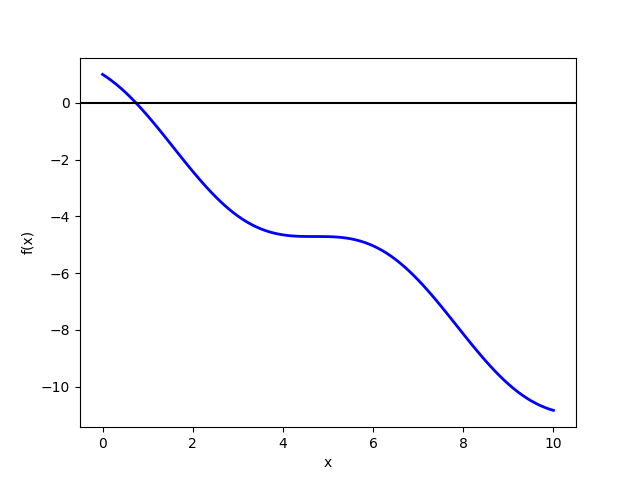

In [4]:
# plot function
%matplotlib notebook
import matplotlib.pyplot as plt
x = np.linspace(0,10,101)
plt.plot(x, myfunc(x), 'b-', linewidth=2)
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [5]:
secant(myfunc, 0., 2., 1e-9, 100)

iteration 1 : approximate location of root at 0.585454927933
iteration 2 : approximate location of root at 0.717134868255
iteration 3 : approximate location of root at 0.73990076549
iteration 4 : approximate location of root at 0.739081136054
iteration 5 : approximate location of root at 0.739085132496
iteration 6 : approximate location of root at 0.739085133215
SUCCESS! Root has been located to within the specified tolerance after 6 iterations.
Root is located at 0.739085133215 +/- 7.19566961571e-10


## 5. A more stubborn example

In [5]:
# define function whose roots we are searching for
def myfunc2(x):
    return np.exp(-x) - 1

<IPython.core.display.Javascript object>


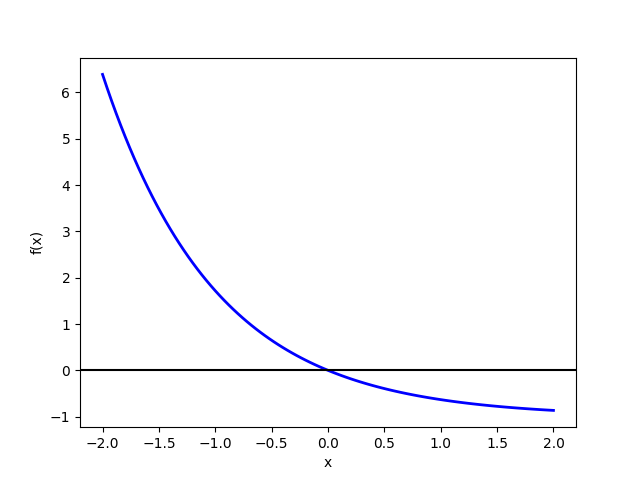

In [6]:
# plot function
%matplotlib notebook
import matplotlib.pyplot as plt
x = np.linspace(-2,2,101)
plt.plot(x, myfunc2(x), 'b-', linewidth=2)
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [8]:
secant(myfunc2, -1, 1, 1e-7, 100)

iteration 1 : approximate location of root at 0.46211715726
iteration 2 : approximate location of root at -0.297393757184
iteration 3 : approximate location of root at 0.069795290219
iteration 4 : approximate location of root at 0.00996804916678
iteration 5 : approximate location of root at -0.000352505926173
iteration 6 : approximate location of root at 1.7597132704e-06
iteration 7 : approximate location of root at 3.10136540759e-10
iteration 8 : approximate location of root at -3.15253023752e-16
iteration 9 : approximate location of root at -9.32083823948e-17
iteration 10 : approximate location of root at -9.32083823948e-17
SUCCESS! Root has been located to within the specified tolerance after 10 iterations.
Root is located at -9.32083823948e-17 +/- 0.0
